In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# INIT
# Parameters
# Transmission Rates
transmission_wc_wc = 0.1
transmission_bc_bc = 0.6
transmission_wc_bc = 0.2
transmission_bc_wc = 0.3
# Recovery Rates
recovery_wc = 0.1
recovery_bc = 0.1

# Initial conditions
S_wc0 = 0.99
I_wc0 = 0.01
R_wc0 = 0.00
D_wc0 = 0.00
S_bc0 = 0.99
I_bc0 = 0.01
R_bc0 = 0.00
D_bc0 = 0.00

# Death Rates
death_w = 0.005
death_b = 0.007

# Number of time steps
num_steps = 100
delta_t = 0.01

# Initialize arrays
S_wc, I_wc, R_wc, D_wc, S_bc, I_bc, R_bc, D_bc = np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1), np.zeros(int(num_steps * 1/delta_t) + 1)

# Set initial values
S_wc[0] = S_wc0
I_wc[0] = I_wc0
R_wc[0] = R_wc0
D_wc[0] = D_wc0
S_bc[0] = S_bc0
I_bc[0] = I_bc0
R_bc[0] = R_bc0
D_bc[0] = D_bc0

In [3]:
# RUN
# Simulation loop
x = [i*delta_t for i in range(int(num_steps * (1/delta_t) + 1))]
for t in np.arange(0, int(num_steps * (1/delta_t))):
    new_infected_wc = transmission_wc_wc * S_wc[t] * I_wc[t] * delta_t + transmission_bc_wc * S_wc[t] * I_bc[t] * delta_t
    new_infected_bc = transmission_bc_bc * S_bc[t] * I_bc[t] * delta_t + transmission_wc_bc * S_bc[t] * I_wc[t] * delta_t
    
    new_recovered_wc = recovery_wc * I_wc[t] * delta_t
    new_recovered_bc = recovery_bc * I_bc[t] * delta_t
    
    new_dead_wc = I_wc[t] * death_w * delta_t
    new_dead_bc = I_bc[t] * death_b * delta_t

    S_wc[t+1] = S_wc[t] - new_infected_wc
    I_wc[t+1] = I_wc[t] + new_infected_wc - new_recovered_wc - new_dead_wc
    R_wc[t+1] = R_wc[t] + new_recovered_wc
    D_wc[t+1] = D_wc[t] + new_dead_wc

    S_bc[t+1] = S_bc[t] - new_infected_bc
    I_bc[t+1] = I_bc[t] + new_infected_bc - new_recovered_bc - new_dead_bc
    R_bc[t+1] = R_bc[t] + new_recovered_bc
    D_bc[t+1] = D_bc[t] + new_dead_bc

End: 
Blue Collar: 
 Susceptible: 0.00056220050747345 
 Infected: 5.5939757747687196e-05 
 Recovered: 0.934001738069882 
 Dead: 0.0653801216648917
White Collar: 
 Susceptible: 0.023651870347831973 
 Infected: 0.00013671824386287786 
 Recovered: 0.929725153722192 
 Dead:0.04648625768610977
Total: 
 Susceptible: 0.012107035427652712 
 Infected: 9.632900080528252e-05 
 Recovered: 0.931863445896037 
 Dead: 0.05593318967550073

Max infected: 
 Blue Collar: 0.5734825085367072 
 White Collar: 0.47758405300021123 
 Total: 0.5161930115122294


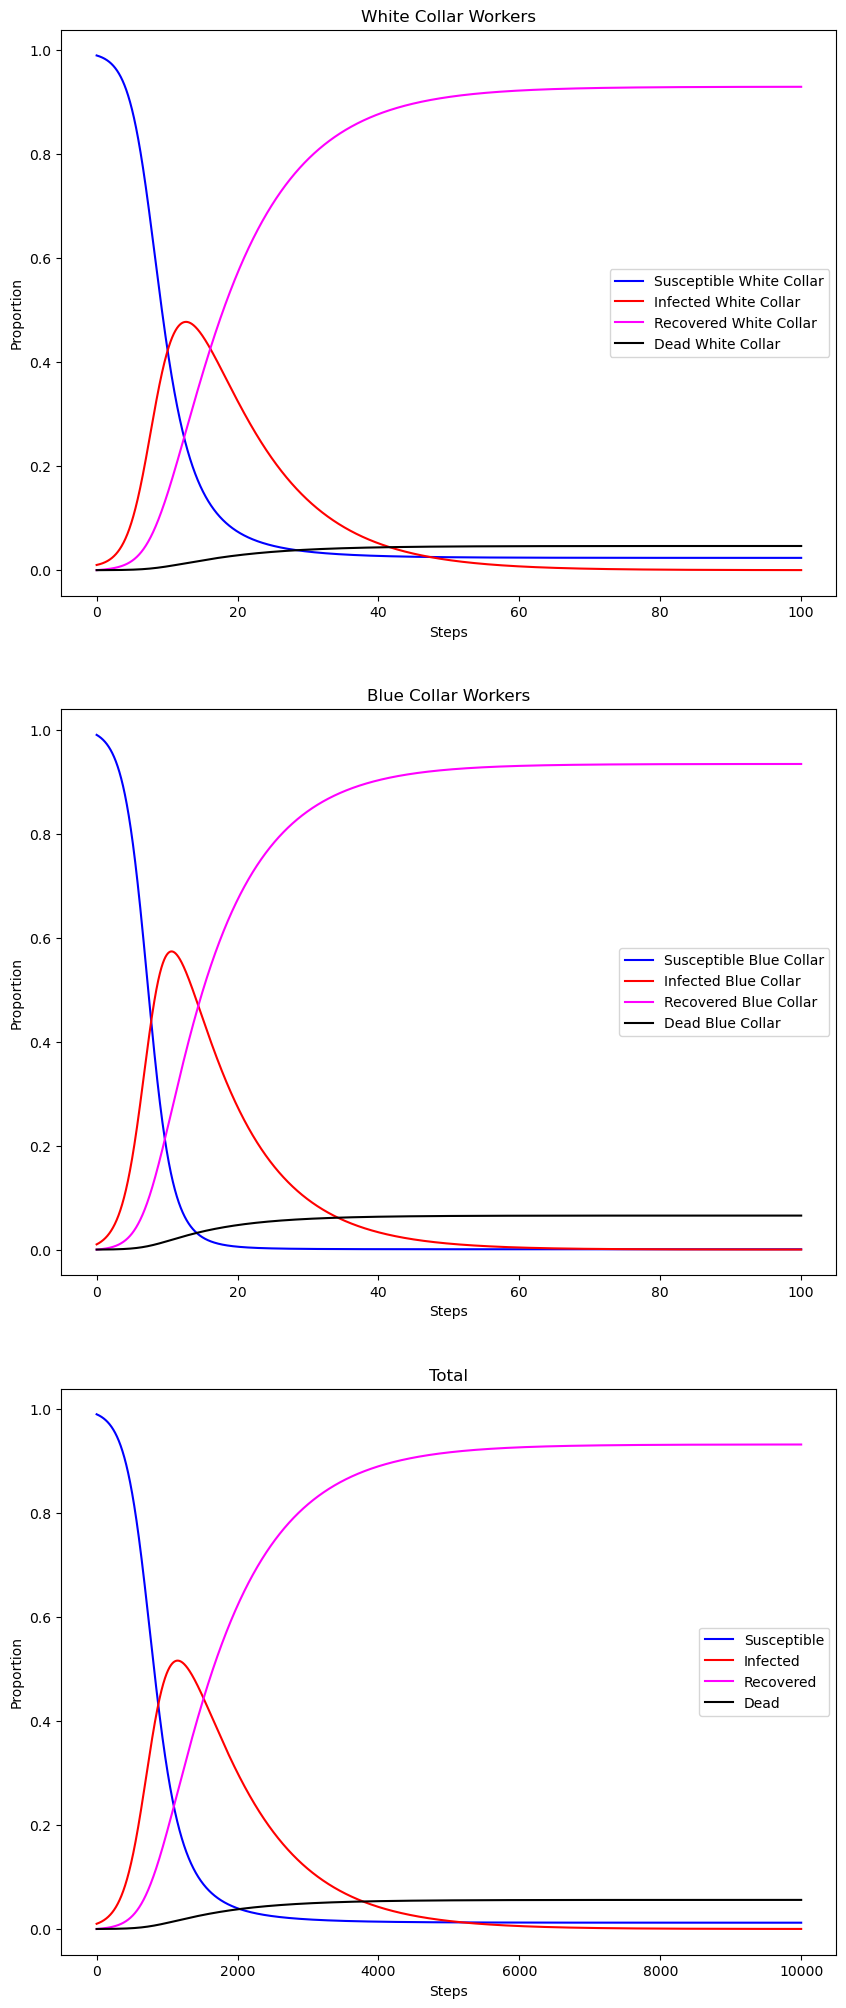

In [4]:
# ANALYSIS
# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 25))
ax[0].plot(x, S_wc, 'blue', label='Susceptible White Collar')
ax[0].plot(x, I_wc, 'red', label='Infected White Collar')
ax[0].plot(x, R_wc, 'fuchsia', label='Recovered White Collar')
ax[0].plot(x, D_wc, 'black', label='Dead White Collar')

ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Proportion')
ax[0].set_title('White Collar Workers')
ax[0].legend()

ax[1].plot(x, S_bc, 'blue', label='Susceptible Blue Collar')
ax[1].plot(x, I_bc, 'red', label='Infected Blue Collar')
ax[1].plot(x, R_bc, 'fuchsia', label='Recovered Blue Collar')
ax[1].plot(x, D_bc, 'black', label='Dead Blue Collar')

ax[1].set_xlabel('Steps')
ax[1].set_ylabel('Proportion')
ax[1].set_title('Blue Collar Workers')
ax[1].legend()

ax[2].plot((S_bc + S_wc)/2, 'blue', label='Susceptible')
ax[2].plot((I_bc + I_wc)/2, 'red', label='Infected')
ax[2].plot((R_bc + R_wc)/2, 'fuchsia', label='Recovered')
ax[2].plot((D_bc + D_wc)/2, 'black', label='Dead')

ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Proportion')
ax[2].set_title('Total')
ax[2].legend()

print("End: ")
print(f'Blue Collar: \n Susceptible: {S_bc[-1]} \n Infected: {I_bc[-1]} \n Recovered: {R_bc[-1]} \n Dead: {D_bc[-1]}')
print(f'White Collar: \n Susceptible: {S_wc[-1]} \n Infected: {I_wc[-1]} \n Recovered: {R_wc[-1]} \n Dead:{D_wc[-1]}')
print(f'Total: \n Susceptible: {(S_wc[-1] + S_bc[-1])/2} \n Infected: {(I_wc[-1] + I_bc[-1])/2} \n Recovered: {(R_wc[-1] + R_bc[-1])/2} \n Dead: {(D_wc[-1] + D_bc[-1])/2}')

print("")
print(f'Max infected: \n Blue Collar: {np.max(I_bc)} \n White Collar: {np.max(I_wc)} \n Total: {np.max(I_wc + I_bc)/2}')